In [19]:
# Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [134]:
# Import dataset
nyc_sales_df = (pd.read_csv("NYC_Sales_Clean.csv")).drop(columns=['RESIDENTIAL UNITS', 'COMMERCIAL UNITS','BUILDING CLASS AT TIME OF SALE', 'LAND SQUARE FEET'])
nyc_sales_df = nyc_sales_df.rename(columns={'GROSS SQUARE FEET': "SQFT"})
nyc_sales_df = nyc_sales_df[nyc_sales_df.SQFT !=" -  "]
nyc_sales_df["SQFT"] = pd.to_numeric(nyc_sales_df["SQFT"])
print(nyc_sales_df.shape)
print(nyc_sales_df['BUILDING CLASS CATEGORY'].unique())
nyc_sales_df.head(25)

(43353, 9)
['07 RENTALS - WALKUP APARTMENTS             '
 '08 RENTALS - ELEVATOR APARTMENTS           '
 '09 COOPS - WALKUP APARTMENTS               '
 '11A CONDO-RENTALS                           '
 '14 RENTALS - 4-10 UNIT                     '
 '01 ONE FAMILY DWELLINGS                    '
 '02 TWO FAMILY DWELLINGS                    '
 '03 THREE FAMILY DWELLINGS                  '
 '17 CONDO COOPS                             '
 '10 COOPS - ELEVATOR APARTMENTS             '
 '12 CONDOS - WALKUP APARTMENTS              '
 '13 CONDOS - ELEVATOR APARTMENTS            '
 '46 CONDO STORE BUILDINGS                   '
 '15 CONDOS - 2-10 UNIT RESIDENTIAL          '
 '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ']


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,TOTAL UNITS,SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE,SALE PERIOD
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009,5,6440,1900,2,6625000,7-2017
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009,10,6794,1913,2,3936272,9-2016
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009,6,4615,1900,2,8000000,11-2016
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009,8,4226,1920,2,3192840,9-2016
4,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,10009,24,18523,1920,2,16232000,11-2016
5,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,10009,10,12350,2009,2,10350000,10-2016
15,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,10009,24,16776,1928,2,11900000,6-2017
62,ALPHABET CITY,11A CONDO-RENTALS,10009,47,36472,2005,2,28000000,10-2016
125,ALPHABET CITY,14 RENTALS - 4-10 UNIT,10009,4,3360,1910,2,3300000,11-2016
126,ALPHABET CITY,14 RENTALS - 4-10 UNIT,10009,5,5608,1900,2,7215000,1-2017


In [118]:
# Combine all similar neighborhoods
# for idx,row in nyc_sales_df.iterrows():
#     if "UPPER EAST" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "UPPER EAST SIDE"
#     elif "FLUSHING" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "FLUSHING"
#     elif "UPPER WEST" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "UPPER WEST SIDE"
#     elif "FLATBUSH" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "FLATBUSH"
#     elif "HARLEM" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "HARLEM"
#     elif "MIDTOWN" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "MIDTOWN"
#     elif "OCEAN PARKWAY" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "OCEAN PARKWAY"
#     elif "WILLIAMSBURG" in str(row["NEIGHBORHOOD"]):
#         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "WILLIAMSBURG"
# #     elif "PELHAM PARK" in str(row["NEIGHBORHOOD"]):
# #         nyc_sales_df.loc[idx,'NEIGHBORHOOD'] = "PELHAM PARKWAY"


# nyc_sales_df

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TOTAL UNITS,SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE,SALE PERIOD
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,6440,1900,2,6625000,7-2017
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,6794,1913,2,3936272,9-2016
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,4615,1900,2,8000000,11-2016
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8,4226,1920,2,3192840,9-2016
4,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,24,18523,1920,2,16232000,11-2016
...,...,...,...,...,...,...,...,...
63470,WOODROW,02 TWO FAMILY DWELLINGS,2,1300,1995,1,509000,10-2016
63471,WOODROW,02 TWO FAMILY DWELLINGS,2,2160,1994,1,648000,12-2016
63472,WOODROW,02 TWO FAMILY DWELLINGS,2,2575,1998,1,450000,11-2016
63473,WOODROW,02 TWO FAMILY DWELLINGS,2,2377,1998,1,550000,4-2017


In [119]:
# One hot Encoding 
# print(nyc_sales_df['NEIGHBORHOOD'].nunique())
# print(nyc_sales_df['BUILDING CLASS CATEGORY'].nunique())
# print(nyc_sales_df['SALE PERIOD'].nunique())
# KEEPNS = nyc_sales_df['NEIGHBORHOOD'].value_counts().sort_values(ascending=False).head(30)
# for idx,row in nyc_sales_df.iterrows():
#     t = row['NEIGHBORHOOD']
#     if t in KEEPNS:
#         pass
#     else:
#         nyc_sales_df = nyc_sales_df.drop(index=idx, axis=0)
# nyc_sales_df


231
15
12


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TOTAL UNITS,SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE,SALE PERIOD
13928,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,1018,1945,1,325000,1-2017
13929,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,1018,1945,1,127000,4-2017
13930,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,1998,1945,1,400000,12-2016
13931,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,1690,1950,1,0,12-2016
13932,BAYCHESTER,01 ONE FAMILY DWELLINGS,1,1690,1950,1,0,6-2017
...,...,...,...,...,...,...,...,...
60109,GREAT KILLS,02 TWO FAMILY DWELLINGS,2,2000,1975,1,635000,8-2017
60110,GREAT KILLS,02 TWO FAMILY DWELLINGS,2,1800,1970,1,485000,1-2017
60111,GREAT KILLS,02 TWO FAMILY DWELLINGS,2,1800,1970,1,465000,1-2017
60112,GREAT KILLS,02 TWO FAMILY DWELLINGS,2,1880,1970,1,706000,5-2017


In [135]:
print(nyc_sales_df.dtypes)
for col in nyc_sales_df.columns:
    print(col)
    print(nyc_sales_df[col].nunique())

NEIGHBORHOOD                 object
BUILDING CLASS CATEGORY      object
ZIP CODE                      int64
TOTAL UNITS                   int64
SQFT                          int64
YEAR BUILT                    int64
TAX CLASS AT TIME OF SALE     int64
SALE_PRICE                    int64
SALE PERIOD                  object
dtype: object
NEIGHBORHOOD
247
BUILDING CLASS CATEGORY
15
ZIP CODE
177
TOTAL UNITS
154
SQFT
4454
YEAR BUILT
150
TAX CLASS AT TIME OF SALE
3
SALE_PRICE
5726
SALE PERIOD
12


In [136]:
# Convert categorical data to numeric
nyc_sales_df = pd.get_dummies(nyc_sales_df, drop_first=True)

In [137]:
nyc_sales_df.head()

,ZIP CODE,TOTAL UNITS,SQFT,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,...,SALE PERIOD_11-2016,SALE PERIOD_12-2016,SALE PERIOD_2-2017,SALE PERIOD_3-2017,SALE PERIOD_4-2017,SALE PERIOD_5-2017,SALE PERIOD_6-2017,SALE PERIOD_7-2017,SALE PERIOD_8-2017,SALE PERIOD_9-2016
0,10009,5,6440,1900,2,6625000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,10009,10,6794,1913,2,3936272,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10009,6,4615,1900,2,8000000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10009,8,4226,1920,2,3192840,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10009,24,18523,1920,2,16232000,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [123]:
for col in nyc_sales_df.columns:
    print(col)

TOTAL UNITS
SQFT
YEAR BUILT
TAX CLASS AT TIME OF SALE
SALE_PRICE
NEIGHBORHOOD_BAYCHESTER
NEIGHBORHOOD_BAYSIDE
NEIGHBORHOOD_BEDFORD STUYVESANT
NEIGHBORHOOD_BENSONHURST
NEIGHBORHOOD_BOROUGH PARK
NEIGHBORHOOD_BROOKLYN HEIGHTS
NEIGHBORHOOD_BUSHWICK
NEIGHBORHOOD_CANARSIE
NEIGHBORHOOD_CROWN HEIGHTS
NEIGHBORHOOD_EAST NEW YORK
NEIGHBORHOOD_FLATBUSH
NEIGHBORHOOD_FLUSHING
NEIGHBORHOOD_GRAVESEND
NEIGHBORHOOD_GREAT KILLS
NEIGHBORHOOD_MIDWOOD
NEIGHBORHOOD_OCEAN PARKWAY
NEIGHBORHOOD_PARK SLOPE
NEIGHBORHOOD_PARKCHESTER
NEIGHBORHOOD_RICHMOND HILL
NEIGHBORHOOD_RIVERDALE
NEIGHBORHOOD_SHEEPSHEAD BAY
NEIGHBORHOOD_SO. JAMAICA-BAISLEY PARK
NEIGHBORHOOD_SOUNDVIEW
NEIGHBORHOOD_SOUTH OZONE PARK
NEIGHBORHOOD_SPRINGFIELD GARDENS
NEIGHBORHOOD_ST. ALBANS
NEIGHBORHOOD_SUNSET PARK
NEIGHBORHOOD_WILLIAMSBRIDGE
NEIGHBORHOOD_WILLIAMSBURG
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                    
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                  
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APART

In [138]:
# Separate features
X = nyc_sales_df.drop(["SALE_PRICE"], axis=1)
y = nyc_sales_df["SALE_PRICE"]

In [139]:
# Create train and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [140]:
# # Scale X
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# testX = X.iloc[0:5000,:]
# testY = y.iloc[0:5000]
# print(testX.shape)
# print(testY.shape)

(5000, 9225)
(5000,)


In [8]:
#delete this cell later
# X_train, X_test, y_train, y_test = train_test_split(testX, testY, random_state=42)
# # Scale X
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [141]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()
reg = LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

-1.2402621971713193e+18

In [142]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1).fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model.score(X_test_scaled, y_test)}')

Training Score: 0.8761432539985238
Testing Score: 0.25291453713067624


In [143]:
#RANDOM FOREST on unscaled
model = RandomForestRegressor(random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.8761600112358549
Testing Score: 0.25290439810329823


In [88]:
# Dumps first one with scaled
from joblib import dump
dump(model, 'RandomForest1.joblib')


['RandomForest1.joblib']

In [144]:
from sklearn.ensemble import ExtraTreesRegressor
clf = ExtraTreesRegressor(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9653854185898845
Testing Score: 0.22169725655806982


In [145]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
#print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: -8.373495699699362
Testing Score: -1.1884027028131015


In [147]:
def model_tester(model):
    clf = model.fit(X_train_scaled, y_train)
    #print(classification_report(y_test, y_pred, target_names=target_names))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(ExtraTreesRegressor(random_state=1, n_estimators=200))
model_tester(ExtraTreesRegressor(random_state=1, n_estimators=500))
model_tester(ExtraTreesRegressor(random_state=1, n_estimators=1000))
model_tester(ExtraTreesRegressor(random_state=1, n_estimators=2000))
model_tester(RandomForestRegressor(random_state=1, n_estimators=200))
model_tester(RandomForestRegressor(random_state=1, n_estimators=500))
model_tester(RandomForestRegressor(random_state=1, n_estimators=1000))
model_tester(RandomForestRegressor(random_state=1, n_estimators=2000))

Training Score: 0.9653854182897889
Testing Score: 0.21943857729889027
Training Score: 0.9653854182515552
Testing Score: 0.22367341478742875
Training Score: 0.9653854182423585
Testing Score: 0.22113048141130132
Training Score: 0.9653854181690188
Testing Score: 0.22264585221049848
Training Score: 0.8832269160701198
Testing Score: 0.24771182807438552
Training Score: 0.8826383579873672
Testing Score: 0.2348807200081251
Training Score: 0.8856155766092264
Testing Score: 0.2344986454344442
Training Score: 0.8844548082430677
Testing Score: 0.23417844988500558


In [146]:
model_tester(RandomForestRegressor(random_state=1, n_estimators=50))
model_tester(RandomForestRegressor(random_state=1, n_estimators=20))
model_tester(RandomForestRegressor(random_state=1, n_estimators=15))
model_tester(RandomForestRegressor(random_state=1, n_estimators=10))
model_tester(RandomForestRegressor(random_state=1, n_estimators=5))

Training Score: 0.8760381343699959
Testing Score: 0.22798714339598292
Training Score: 0.8589889025159757
Testing Score: 0.20829458561425707
Training Score: 0.8497673385262299
Testing Score: 0.20877720529480237
Training Score: 0.84297274844969
Testing Score: 0.19089890669572374
Training Score: 0.8165902737398951
Testing Score: 0.17479902526384306


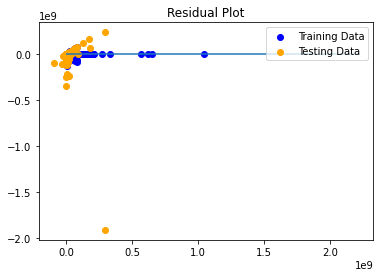

In [41]:
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")
# plt.show()